In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('crime_data.csv')

In [3]:
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [4]:
df = df.fillna(0)
df.isnull().any()

jurisdiction                                             False
year                                                     False
population                                               False
murder                                                   False
rape                                                     False
robbery                                                  False
agg_assault                                              False
b_e                                                      False
larceny_theft                                            False
m_v_theft                                                False
grand_total                                              False
violent_crime_total                                      False
violent_crime_percent                                    False
property_crime_totals                                    False
property_crime_percent                                   False
overall_crime_rate_per_100_000_people                  

In [5]:
df.rename(columns={'agg_assault':'Aggravated Assault','b_e':'Breaking & Entering', 'm_v_theft':'Motor Vehicle Theft'}, inplace=True)

In [6]:
list=df.columns
list

Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people',
       'percent_change', 'violent_crime_percent_change',
       'property_crime_percent_change',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_rate_percent_change_per_100_000_peo

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   jurisdiction                                           1104 non-null   object 
 1   year                                                   1104 non-null   int64  
 2   population                                             1104 non-null   int64  
 3   murder                                                 1104 non-null   int64  
 4   rape                                                   1104 non-null   int64  
 5   robbery                                                1104 non-null   int64  
 6   Aggravated Assault                                     1104 non-null   int64  
 7   Breaking & Entering                                    1104 non-null   int64  
 8   larceny_theft                                   

In [8]:
df.head()

,jurisdiction,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,...,overall_percent_change_per_100_000_people,violent_crime_rate_percent_change_per_100_000_people,property_crime_rate_percent_change_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,-13.4,-41.8,-11.6,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,6.4,49.2,4.5,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,-1.0,-17.5,0.0,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,9.3,8.2,9.4,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='poly',C=1, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred = svm_classifier.predict(X_test)

print('C=1')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred))



C=1
Accuracy: 0.2669683257918552
                        precision    recall  f1-score   support

       Allegany County       0.00      0.00      0.00         8
   Anne Arundel County       0.94      1.00      0.97        15
        Baltimore City       0.89      1.00      0.94         8
      Baltimore County       0.67      0.75      0.71         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.00      0.00      0.00         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.00      0.00      0.00         7
     Dorchester County       0.00      0.00      0.00         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.46      0.67      0.55         9
         Howard County       1.00      0.45      0.62        11
      

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Save Train Data to CSV
train_csv_path = 'train_data.csv'
X_train.to_csv(train_csv_path, index=False)

print("Train Data:")
train_data = pd.read_csv(train_csv_path)
train_data


Train Data:


,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,grand_total,...,overall_crime_rate_per_100_000_people,violent_crime_rate_per_100_000_people,property_crime_rate_per_100_000_people,murder_per_100_000_people,rape_per_100_000_people,robbery_per_100_000_people,agg_assault_per_100_000_people,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people
0,2015,149573,9,30,121,293,809,1974,175,3411,...,2280.5,302.9,1977.6,6.0,20.1,80.9,195.9,540.9,1319.8,117.0
1,2001,30214,0,14,25,123,247,548,67,1024,...,3389.2,536.2,2853.0,0.0,46.3,82.7,407.1,817.5,1813.7,221.8
2,1989,120554,1,31,41,225,700,2020,126,3144,...,2608.0,247.2,2360.8,0.8,25.7,34.0,186.6,580.7,1675.6,104.5
3,1991,125394,5,24,34,90,623,2465,185,3426,...,2732.2,122.0,2610.2,4.0,19.1,27.1,71.8,496.8,1965.8,147.5
4,1977,82102,3,7,32,85,592,1390,102,2211,...,2693.0,154.7,2538.3,3.7,8.5,39.0,103.5,721.1,1693.0,124.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1981,115420,4,15,76,345,1285,2790,181,4696,...,4068.6,381.2,3687.4,3.5,13.0,65.8,298.9,1113.3,2417.3,156.8
879,2004,634279,276,182,4085,7199,8022,21819,6731,48314,...,7617.2,1851.2,5765.9,43.5,28.7,644.0,1135.0,1264.7,3440.0,1061.2
880,2007,92169,5,42,230,533,1070,2746,191,4817,...,5226.3,878.8,4347.4,5.4,45.6,249.5,578.3,1160.9,2979.3,207.2
881,2012,52011,1,16,31,138,432,1751,33,2402,...,4618.3,357.6,4260.6,1.9,30.8,59.6,265.3,830.6,3366.6,63.4


In [11]:
# Save Test Data to CSV
test_csv_path = 'test_data.csv'
X_test.to_csv(test_csv_path, index=False)
print("\nTest Data:")
test_data = pd.read_csv(test_csv_path)
test_data


Test Data:


,year,population,murder,rape,robbery,Aggravated Assault,Breaking & Entering,larceny_theft,Motor Vehicle Theft,grand_total,...,overall_crime_rate_per_100_000_people,violent_crime_rate_per_100_000_people,property_crime_rate_per_100_000_people,murder_per_100_000_people,rape_per_100_000_people,robbery_per_100_000_people,agg_assault_per_100_000_people,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people
0,2008,170347,1,21,40,298,597,2172,124,3253,...,1909.6,211.3,1698.3,0.6,12.3,23.5,174.9,350.5,1275.0,72.8
1,2004,88155,5,32,205,550,914,2715,185,4606,...,5224.9,898.4,4326.5,5.7,36.3,232.5,623.9,1036.8,3079.8,209.9
2,1988,95856,5,19,58,407,892,2391,386,4158,...,4337.8,510.1,3827.6,5.2,19.8,60.5,424.6,930.6,2494.4,402.7
3,2012,239031,1,50,131,438,675,3105,198,4598,...,1923.6,259.4,1664.2,0.4,20.9,54.8,183.2,282.4,1299.0,82.8
4,2020,28797,2,8,1,53,66,215,12,357,...,1239.7,222.2,1017.5,6.9,27.8,3.5,184.0,229.2,746.6,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2020,103796,3,32,91,370,253,1360,93,2202,...,2121.5,477.9,1643.6,2.9,30.8,87.7,356.5,243.7,1310.3,89.6
217,2020,168032,5,36,19,127,164,974,48,1373,...,817.1,111.3,705.8,3.0,21.4,11.3,75.6,97.6,579.7,28.6
218,1991,123385,2,35,58,264,766,2296,184,3605,...,2921.7,291.0,2630.8,1.6,28.4,47.0,214.0,620.8,1860.8,149.1
219,1979,26841,3,4,13,57,266,673,43,1059,...,3945.5,286.9,3658.6,11.2,14.9,48.4,212.4,991.0,2507.4,160.2


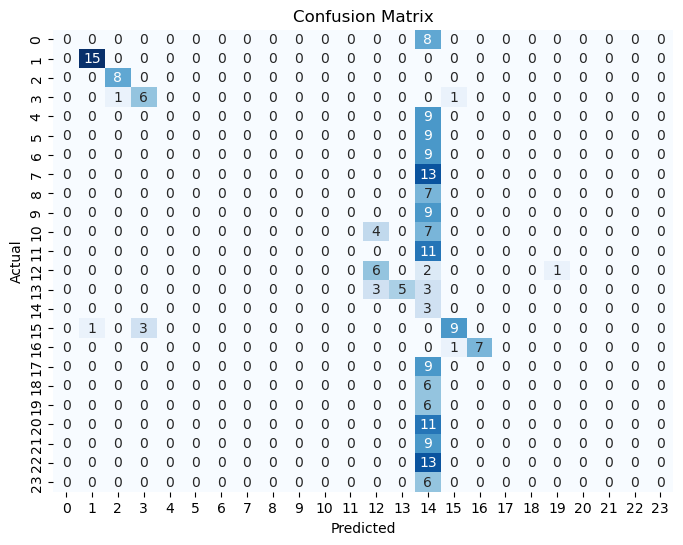

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier1= SVC(kernel='poly',C=5, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier1.fit(X_train, y_train)

# Making predictions
y_pred1 = svm_classifier1.predict(X_test)

print('C=5')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred1))


C=5
Accuracy: 0.2986425339366516
                        precision    recall  f1-score   support

       Allegany County       0.00      0.00      0.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       1.00      1.00      1.00         8
      Baltimore County       1.00      0.75      0.86         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.30      0.33      0.32         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.00      0.00      0.00         7
     Dorchester County       0.00      0.00      0.00         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.46      0.67      0.55         9
         Howard County       1.00      0.45      0.62        11
      

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


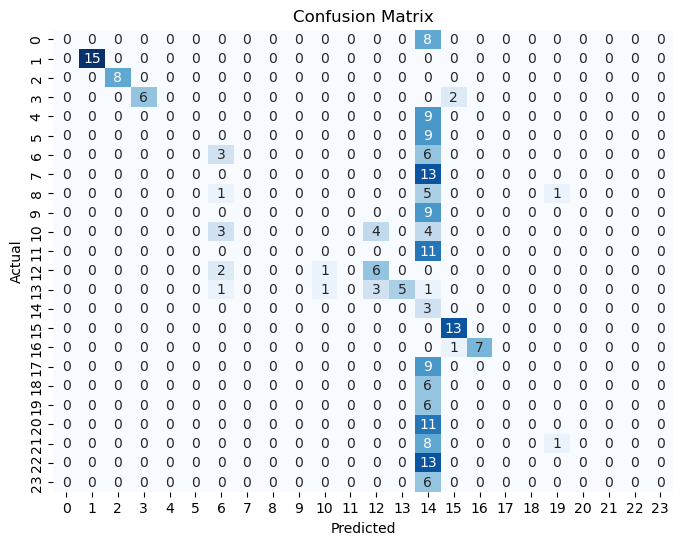

In [14]:
cm1 = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier2= SVC(kernel='poly',C=15, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier2.fit(X_train, y_train)

# Making predictions
y_pred2 = svm_classifier2.predict(X_test)

print('C=15')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred2))


C=15
Accuracy: 0.3076923076923077
                        precision    recall  f1-score   support

       Allegany County       0.00      0.00      0.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       1.00      1.00      1.00         8
      Baltimore County       1.00      0.75      0.86         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.25      0.33      0.29         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.25      0.14      0.18         7
     Dorchester County       0.00      0.00      0.00         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.46      0.67      0.55         9
         Howard County       1.00      0.45      0.62        11
     

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


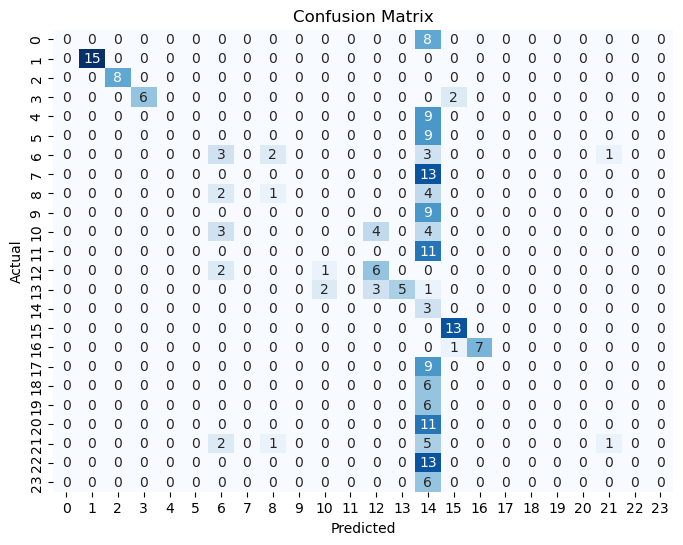

In [16]:
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier3= SVC(kernel='linear',C=2, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier3.fit(X_train, y_train)

# Making predictions
y_pred3 = svm_classifier3.predict(X_test)

print('C=2')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred3))


C=2
Accuracy: 0.8959276018099548
                        precision    recall  f1-score   support

       Allegany County       1.00      1.00      1.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       1.00      1.00      1.00         8
      Baltimore County       1.00      0.75      0.86         8
        Calvert County       0.75      1.00      0.86         9
       Caroline County       0.83      0.56      0.67         9
        Carroll County       0.75      1.00      0.86         9
          Cecil County       0.82      0.69      0.75        13
        Charles County       0.88      1.00      0.93         7
     Dorchester County       0.80      0.89      0.84         9
      Frederick County       1.00      0.91      0.95        11
        Garrett County       0.85      1.00      0.92        11
        Harford County       0.90      1.00      0.95         9
         Howard County       1.00      1.00      1.00        11
      

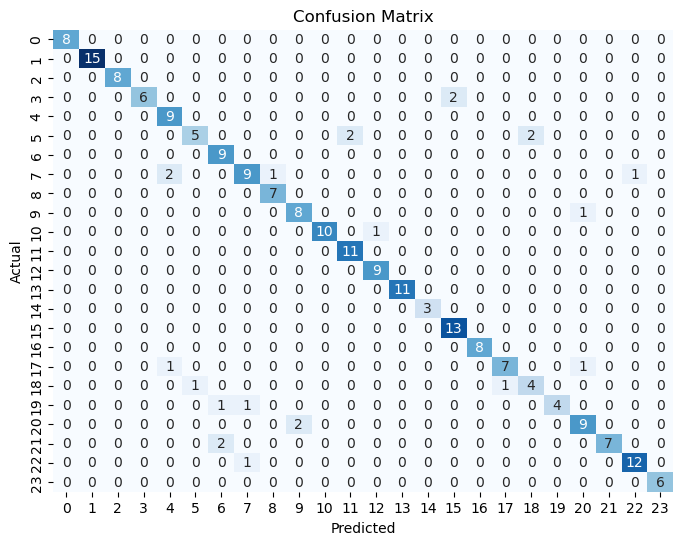

In [18]:
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier4= SVC(kernel='linear',C=1, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier4.fit(X_train, y_train)

# Making predictions
y_pred4 = svm_classifier4.predict(X_test)

print('C=1')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred4))


C=1
Accuracy: 0.8959276018099548
                        precision    recall  f1-score   support

       Allegany County       1.00      1.00      1.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       1.00      1.00      1.00         8
      Baltimore County       1.00      0.75      0.86         8
        Calvert County       0.75      1.00      0.86         9
       Caroline County       0.83      0.56      0.67         9
        Carroll County       0.75      1.00      0.86         9
          Cecil County       0.82      0.69      0.75        13
        Charles County       0.88      1.00      0.93         7
     Dorchester County       0.80      0.89      0.84         9
      Frederick County       1.00      0.91      0.95        11
        Garrett County       0.85      1.00      0.92        11
        Harford County       0.90      1.00      0.95         9
         Howard County       1.00      1.00      1.00        11
      

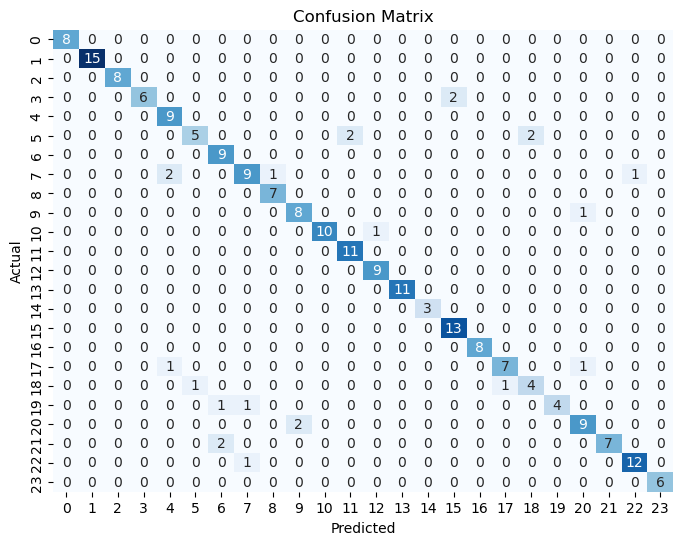

In [20]:
cm4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)

# Create a Support Vector Machine classifier
svm_classifier5= SVC(kernel='linear',C=5, random_state=42)  # you can choose different kernels (linear, polynomial, radial basis function)

# Training the SVM classifier
svm_classifier5.fit(X_train, y_train)

# Making predictions
y_pred5 = svm_classifier5.predict(X_test)

print('C=5')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print(classification_report(y_test, y_pred5))


C=5
Accuracy: 0.8959276018099548
                        precision    recall  f1-score   support

       Allegany County       1.00      1.00      1.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       1.00      1.00      1.00         8
      Baltimore County       1.00      0.75      0.86         8
        Calvert County       0.75      1.00      0.86         9
       Caroline County       0.83      0.56      0.67         9
        Carroll County       0.75      1.00      0.86         9
          Cecil County       0.82      0.69      0.75        13
        Charles County       0.88      1.00      0.93         7
     Dorchester County       0.80      0.89      0.84         9
      Frederick County       1.00      0.91      0.95        11
        Garrett County       0.85      1.00      0.92        11
        Harford County       0.90      1.00      0.95         9
         Howard County       1.00      1.00      1.00        11
      

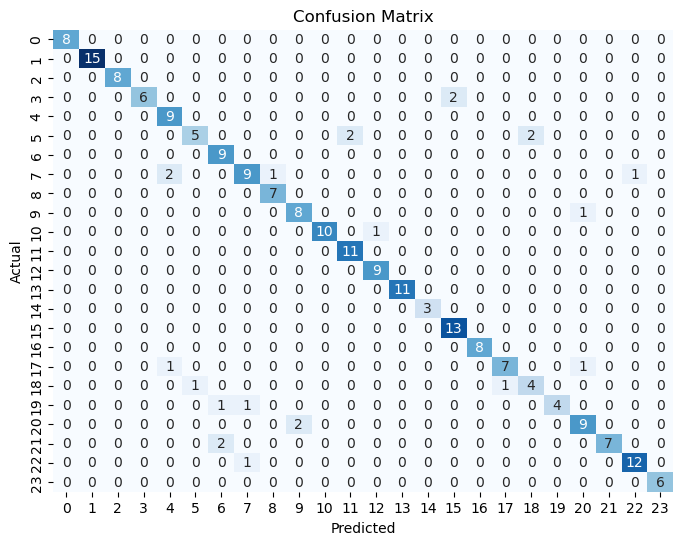

In [22]:
cm5 = confusion_matrix(y_test, y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)


gamma_value = 'scale'  # You can also use 'auto'

# Create a Support Vector Machine classifier with RBF kernel
svm_classifier6 = SVC(kernel='rbf', C=1, gamma=gamma_value, random_state=42)

# Training the SVM classifier
svm_classifier6.fit(X_train, y_train)

# Making predictions
y_pred6 = svm_classifier6.predict(X_test)

print('C=1')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred6)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred6))


C=1
Accuracy: 0.2398190045248869
Classification Report:
                        precision    recall  f1-score   support

       Allegany County       0.00      0.00      0.00         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       0.45      0.62      0.53         8
      Baltimore County       0.50      0.50      0.50         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.30      0.33      0.32         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.06      0.14      0.09         7
     Dorchester County       0.00      0.00      0.00         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.43      1.00      0.60         9
         Howard County       1.00      0.18    

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


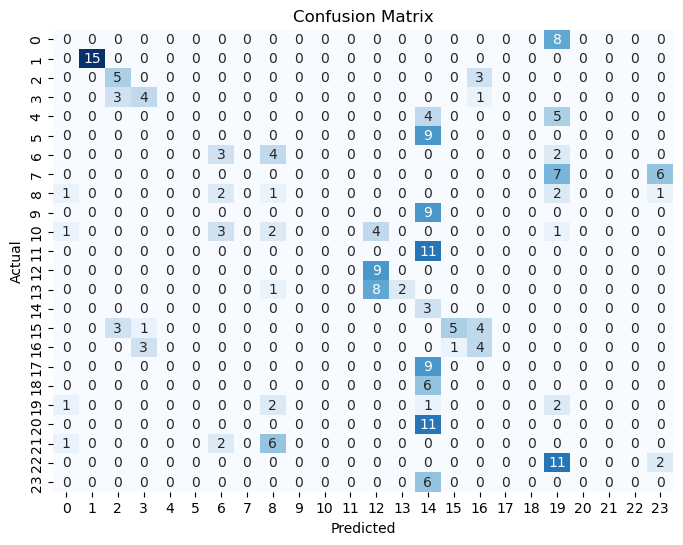

In [24]:
cm6 = confusion_matrix(y_test, y_pred6)
plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)


gamma_value = 'scale'  # You can also use 'auto'

# Create a Support Vector Machine classifier with RBF kernel
svm_classifier7 = SVC(kernel='rbf', C=15, gamma=gamma_value, random_state=42)

# Training the SVM classifier
svm_classifier7.fit(X_train, y_train)

# Making predictions
y_pred7 = svm_classifier7.predict(X_test)

print('C=15')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred7)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred7))


C=15
Accuracy: 0.416289592760181
Classification Report:
                        precision    recall  f1-score   support

       Allegany County       0.27      1.00      0.42         8
   Anne Arundel County       1.00      1.00      1.00        15
        Baltimore City       0.89      1.00      0.94         8
      Baltimore County       0.64      0.88      0.74         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.33      0.33      0.33         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.33      0.14      0.20         7
     Dorchester County       0.24      1.00      0.39         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.45      1.00      0.62         9
         Howard County       1.00      0.27    

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


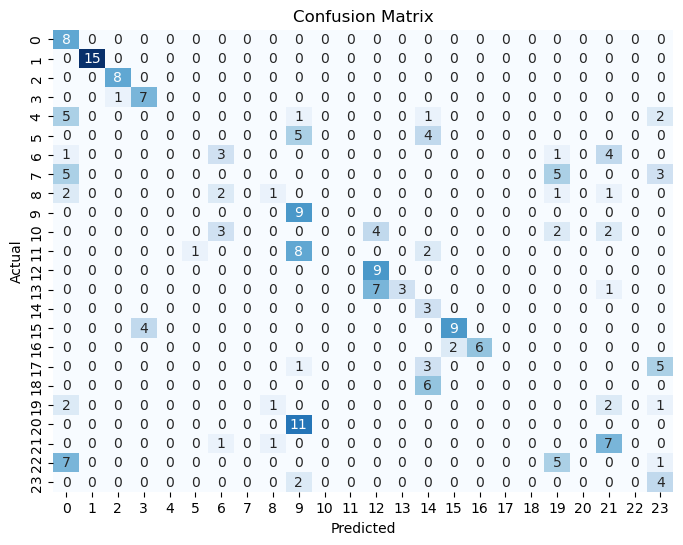

In [26]:
cm7 = confusion_matrix(y_test, y_pred7)
plt.figure(figsize=(8, 6))
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Selected Features
selected_features = ['year', 'population', 'murder', 'rape', 'robbery',
       'Aggravated Assault', 'Breaking & Entering', 'larceny_theft',
       'Motor Vehicle Theft', 'grand_total', 'violent_crime_total',
       'violent_crime_percent', 'property_crime_totals',
       'property_crime_percent', 'overall_crime_rate_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'property_crime_rate_per_100_000_people', 'murder_per_100_000_people',
       'rape_per_100_000_people', 'robbery_per_100_000_people',
       'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
       'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people']

# Target Variable
target_variable = 'jurisdiction'

# Extract relevant data
data = df[selected_features + [target_variable]].copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[selected_features],
    data[target_variable],
    test_size=0.2,
    random_state=42
)


gamma_value = 'scale'  # You can also use 'auto'

# Create a Support Vector Machine classifier with RBF kernel
svm_classifier8 = SVC(kernel='rbf', C=5, gamma=gamma_value, random_state=42)

# Training the SVM classifier
svm_classifier8.fit(X_train, y_train)

# Making predictions
y_pred8 = svm_classifier8.predict(X_test)

print('C=5')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred8)
print(f"Accuracy: {accuracy}")

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred8))


C=5
Accuracy: 0.2986425339366516
Classification Report:
                        precision    recall  f1-score   support

       Allegany County       0.00      0.00      0.00         8
   Anne Arundel County       0.88      1.00      0.94        15
        Baltimore City       0.56      0.62      0.59         8
      Baltimore County       0.56      0.62      0.59         8
        Calvert County       0.00      0.00      0.00         9
       Caroline County       0.00      0.00      0.00         9
        Carroll County       0.30      0.33      0.32         9
          Cecil County       0.00      0.00      0.00        13
        Charles County       0.25      0.14      0.18         7
     Dorchester County       0.00      0.00      0.00         9
      Frederick County       0.00      0.00      0.00        11
        Garrett County       0.00      0.00      0.00        11
        Harford County       0.43      1.00      0.60         9
         Howard County       1.00      0.18    

C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tyagi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


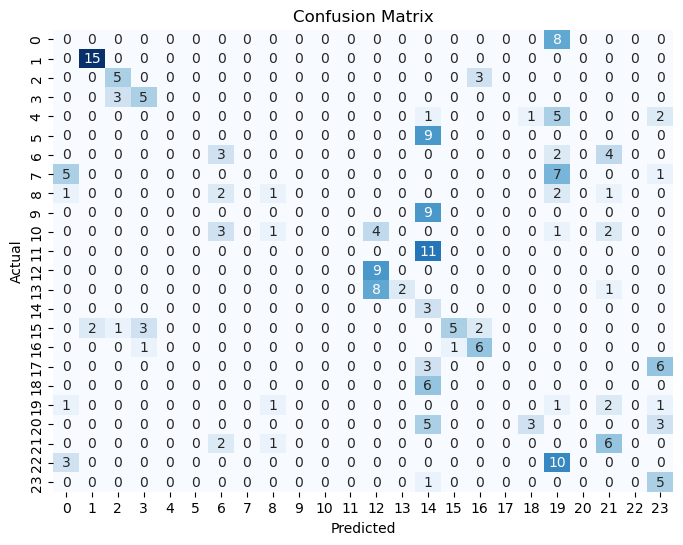

In [28]:
cm8 = confusion_matrix(y_test, y_pred8)
plt.figure(figsize=(8, 6))
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()